In [15]:
import numpy as np
np.set_printoptions(precision=2)

room_temp = 18.333
side_length = 20
oven_temp = 162.778
brownie_target = 85
#Target value is 85

brownie_density = 500
brownie_specific_heat = 2550
brownie_conductivity = 0.15
brownie_alpha = brownie_conductivity / (brownie_density * brownie_specific_heat)

steel_density = 7832
steel_specific_heat = 434
steel_conductivity = 59
steel_alpha = steel_conductivity / (steel_density * steel_specific_heat)

print(brownie_alpha)
print(steel_alpha)

def initialize_brownie_pan(side_length, room_temp):
    return np.full((side_length, side_length), room_temp)


1.176470588235294e-07
1.7357597096632978e-05


In [18]:
import heatrapy as htp

example = htp.SingleObject2D(
    293,
    material='Cu',
    boundaries=(300, 0, 0, 0),
    size=(20, 20)
)

5.8021666666666665 minutes of cooking
[[136.57 119.86 116.18 115.67 115.61 115.61 115.61 115.61 115.61 115.61
  115.61 115.61 115.61 115.61 115.61 115.61 115.67 116.18 119.86 136.57]
 [119.86  96.78  91.82  91.13  91.06  91.06  91.06  91.06  91.06  91.06
   91.06  91.06  91.06  91.06  91.06  91.06  91.13  91.82  96.78 119.86]
 [116.18  91.82  86.61  85.89  85.82  85.81  85.81  85.81  85.81  85.81
   85.81  85.81  85.81  85.81  85.81  85.82  85.89  86.61  91.82 116.18]
 [115.67  91.13  85.89  85.16  85.09  85.08  85.08  85.08  85.08  85.08
   85.08  85.08  85.08  85.08  85.08  85.09  85.16  85.89  91.13 115.67]
 [115.61  91.06  85.82  85.09  85.01  85.01  85.01  85.01  85.01  85.01
   85.01  85.01  85.01  85.01  85.01  85.01  85.09  85.82  91.06 115.61]
 [115.61  91.06  85.81  85.08  85.01  85.    85.    85.    85.    85.
   85.    85.    85.    85.    85.    85.01  85.08  85.81  91.06 115.61]
 [115.61  91.06  85.81  85.08  85.01  85.    85.    85.    85.    85.
   85.    85.    85.    

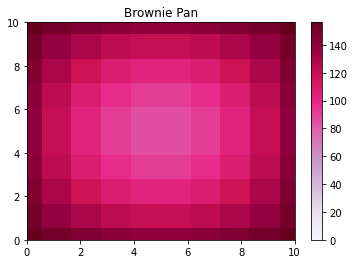

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))

# z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# # x and y are bounds, so z should be the value *inside* those bounds.
# # Therefore, remove the last value from the z array.
# z = z[:-1, :-1]
z = brownie_pan
z_min, z_max = 0, np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='PuRd', vmin=z_min, vmax=z_max)
ax.set_title('Brownie Pan')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

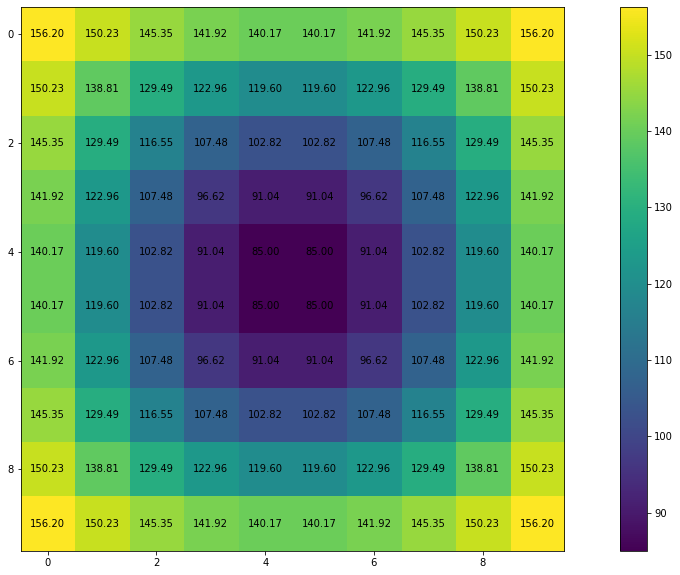

In [6]:
from mlxtend.plotting import heatmap
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)
some_array = np.random.random((20, 30))
heatmap(brownie_pan, figsize=(20, 10))
plt.show()